In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import model_selection, linear_model, metrics, tree, cluster
import random

In [2]:
M = pd.read_csv("../data/M.csv",index_col=0)
A = pd.read_csv("../data/A.csv",index_col=0)
data = pd.read_csv("../data/filtered_data.csv",index_col=0)
metadata = pd.read_excel('../data/filtered_metadata.xls',skiprows=4,usecols = range (1,32))

In [3]:
M.index = data.index
M.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
A1BG-AS1,-0.001279,-0.000339,-0.001552,-0.000415,-0.000518,-0.001332,-0.000038,0.000188,-0.000509,0.025639,...,0.002450,-0.001487,0.000366,0.001137,-0.000064,-0.001552,0.000309,-0.003694,-0.000760,0.000093
A1CF,0.013970,-0.001171,-0.001810,0.000417,-0.000713,0.001491,-0.001198,0.001216,-0.000551,-0.002266,...,-0.000587,-0.000225,-0.000938,0.001870,-0.000795,-0.000518,-0.002188,-0.001417,-0.000505,0.015542
A2M,-0.000324,0.002643,-0.000026,0.003999,0.000325,0.004074,-0.000111,0.000773,-0.002104,-0.001357,...,-0.003833,-0.002304,-0.001740,0.001613,-0.001191,-0.001891,-0.003774,0.002500,0.002015,-0.002240
A2M-AS1,0.000221,-0.000475,0.000517,-0.003764,0.000053,-0.000834,-0.001165,-0.003175,-0.000882,-0.000458,...,-0.000483,0.000763,-0.000060,-0.000533,-0.000229,-0.000645,-0.001539,-0.002371,0.003289,-0.002145
A2ML1,0.000979,0.000028,0.000224,0.000345,-0.000409,0.003132,-0.000299,-0.002939,0.000499,0.059232,...,-0.001151,0.000263,-0.000288,-0.001800,-0.000599,0.000112,-0.000164,0.000251,0.000022,-0.000901


In [4]:
A.index = data.columns
A.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
C1_NK5_CCCGCTTCCTCC,-0.867838,-0.211830,-0.737092,8.525763,-1.368438,-4.785128,0.693173,0.052749,-2.670260,1.143628,...,3.310055,-2.761662,-1.939526,6.484106,-0.279382,0.560581,-0.542018,-0.398402,-5.747150,0.823351
C1_NK9_CCCCCCCATCCA,0.422032,-0.221937,-0.794647,0.130580,-0.382698,0.397982,0.307181,0.334281,-0.500053,0.460038,...,-0.766892,0.846319,-0.826062,-0.180901,2.567209,1.147141,-0.104313,0.256778,-0.691527,1.271352
C1_NK9_CCCAGCCATCTT,0.154800,0.062945,-0.269081,-0.931915,0.443311,0.686342,0.620122,2.105832,0.071043,-0.003903,...,-1.617050,0.096306,-0.877665,0.099822,0.097179,0.557587,0.821407,4.521349,0.029612,-0.431966
C1_NK9_CGCCCCTTTCTT,-0.523582,0.815243,-0.079583,2.396154,0.098729,-0.113193,0.233267,0.931597,0.571308,1.079308,...,-1.187870,-0.220239,-0.679284,0.074459,-0.021616,0.106258,0.133595,2.066975,-1.426214,0.685978
C1_NK9_CCCCCATTTCCC,-0.509703,0.853835,0.376341,2.088085,0.473262,-1.881503,0.799627,-0.327502,-0.633908,0.834962,...,-1.197923,0.527820,0.204771,-0.224432,0.670076,0.056145,-0.994507,-0.660982,-2.136542,-1.098399


In [5]:
train_labels = []
test_labels = []

train_data = pd.DataFrame(columns = A.columns)
test_data = pd.DataFrame(columns = A.columns)

rand_num = random.sample(range(len(A.index)),int(len(A.index)*.8))
for i in rand_num:
    train_labels.append(A.index[i].split("_")[0])
    train_data = train_data.append(A.iloc[i][:])
for i in A.index:
    if i not in train_labels:
        test_labels.append(i.split("_")[0])
        test_data = test_data.append(A.loc[i])

In [6]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
C18_NK41_GAGTATGACGTT,0.339284,0.430629,1.042026,0.603653,-0.168231,0.339713,-0.703550,-0.026426,0.382727,1.165109,...,1.347139,1.148976,1.355903,0.583766,1.002778,0.308313,2.975990,-0.440701,1.731532,11.409749
C18_NK44_CTCCTCCCAACA,-0.165148,0.582226,0.278369,0.980553,0.055362,0.843225,0.477479,0.790019,0.066067,-0.303284,...,0.167085,1.567651,0.573541,-0.072510,-0.250447,-0.140540,1.468020,-0.563624,-0.002773,0.046567
C12_NK29_GTCGTGAAATGG,-0.034965,1.375588,-1.181829,2.465616,-0.317461,1.808350,3.073612,-1.019704,1.747318,-0.537481,...,0.941320,1.954491,2.880142,2.753583,-0.132812,-0.873061,1.339519,1.037575,3.213452,0.237409
C2_NK81_AGATCTCCGAAG,0.066352,0.100983,-0.535573,-0.212225,0.010441,0.081502,1.219569,-0.950486,0.487316,0.400226,...,0.400660,0.376305,0.195136,0.043867,0.557871,-0.001808,7.956260,1.030080,0.790502,1.603749
C23_NK41_CTATGCCAGTAT,4.244672,1.216930,0.928107,2.315626,0.202724,1.143139,-0.123651,-0.184105,0.072497,-0.273765,...,0.353635,0.609168,-0.282660,0.235679,1.048202,0.161042,0.268745,-0.656836,0.972192,-0.353771


In [7]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
C1_NK5_CCCGCTTCCTCC,-0.867838,-0.211830,-0.737092,8.525763,-1.368438,-4.785128,0.693173,0.052749,-2.670260,1.143628,...,3.310055,-2.761662,-1.939526,6.484106,-0.279382,0.560581,-0.542018,-0.398402,-5.747150,0.823351
C1_NK9_CCCCCCCATCCA,0.422032,-0.221937,-0.794647,0.130580,-0.382698,0.397982,0.307181,0.334281,-0.500053,0.460038,...,-0.766892,0.846319,-0.826062,-0.180901,2.567209,1.147141,-0.104313,0.256778,-0.691527,1.271352
C1_NK9_CCCAGCCATCTT,0.154800,0.062945,-0.269081,-0.931915,0.443311,0.686342,0.620122,2.105832,0.071043,-0.003903,...,-1.617050,0.096306,-0.877665,0.099822,0.097179,0.557587,0.821407,4.521349,0.029612,-0.431966
C1_NK9_CGCCCCTTTCTT,-0.523582,0.815243,-0.079583,2.396154,0.098729,-0.113193,0.233267,0.931597,0.571308,1.079308,...,-1.187870,-0.220239,-0.679284,0.074459,-0.021616,0.106258,0.133595,2.066975,-1.426214,0.685978
C1_NK9_CCCCCATTTCCC,-0.509703,0.853835,0.376341,2.088085,0.473262,-1.881503,0.799627,-0.327502,-0.633908,0.834962,...,-1.197923,0.527820,0.204771,-0.224432,0.670076,0.056145,-0.994507,-0.660982,-2.136542,-1.098399


In [18]:
clf = tree.DecisionTreeClassifier(random_state = 0).fit(train_data,train_labels)
predicted_class = clf.predict(test_data)
predicted_class

array(['C1', 'C1', 'C1', ..., 'C28', 'C30', 'C4'], dtype='<U3')

Matthews Correlation Coefficient: 0.8841964766393327


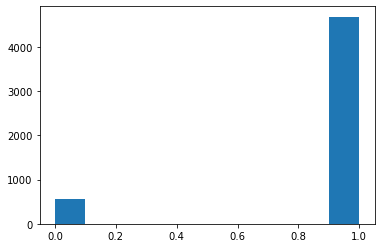

In [19]:
results = []
for i in range(len(predicted_class)):
    if predicted_class[i] == test_labels[i]:
        results.append(1)
    else:
        results.append(0)
result_bar = plt.hist(results)
print("Matthews Correlation Coefficient: "+str(metrics.matthews_corrcoef(test_labels,predicted_class)))

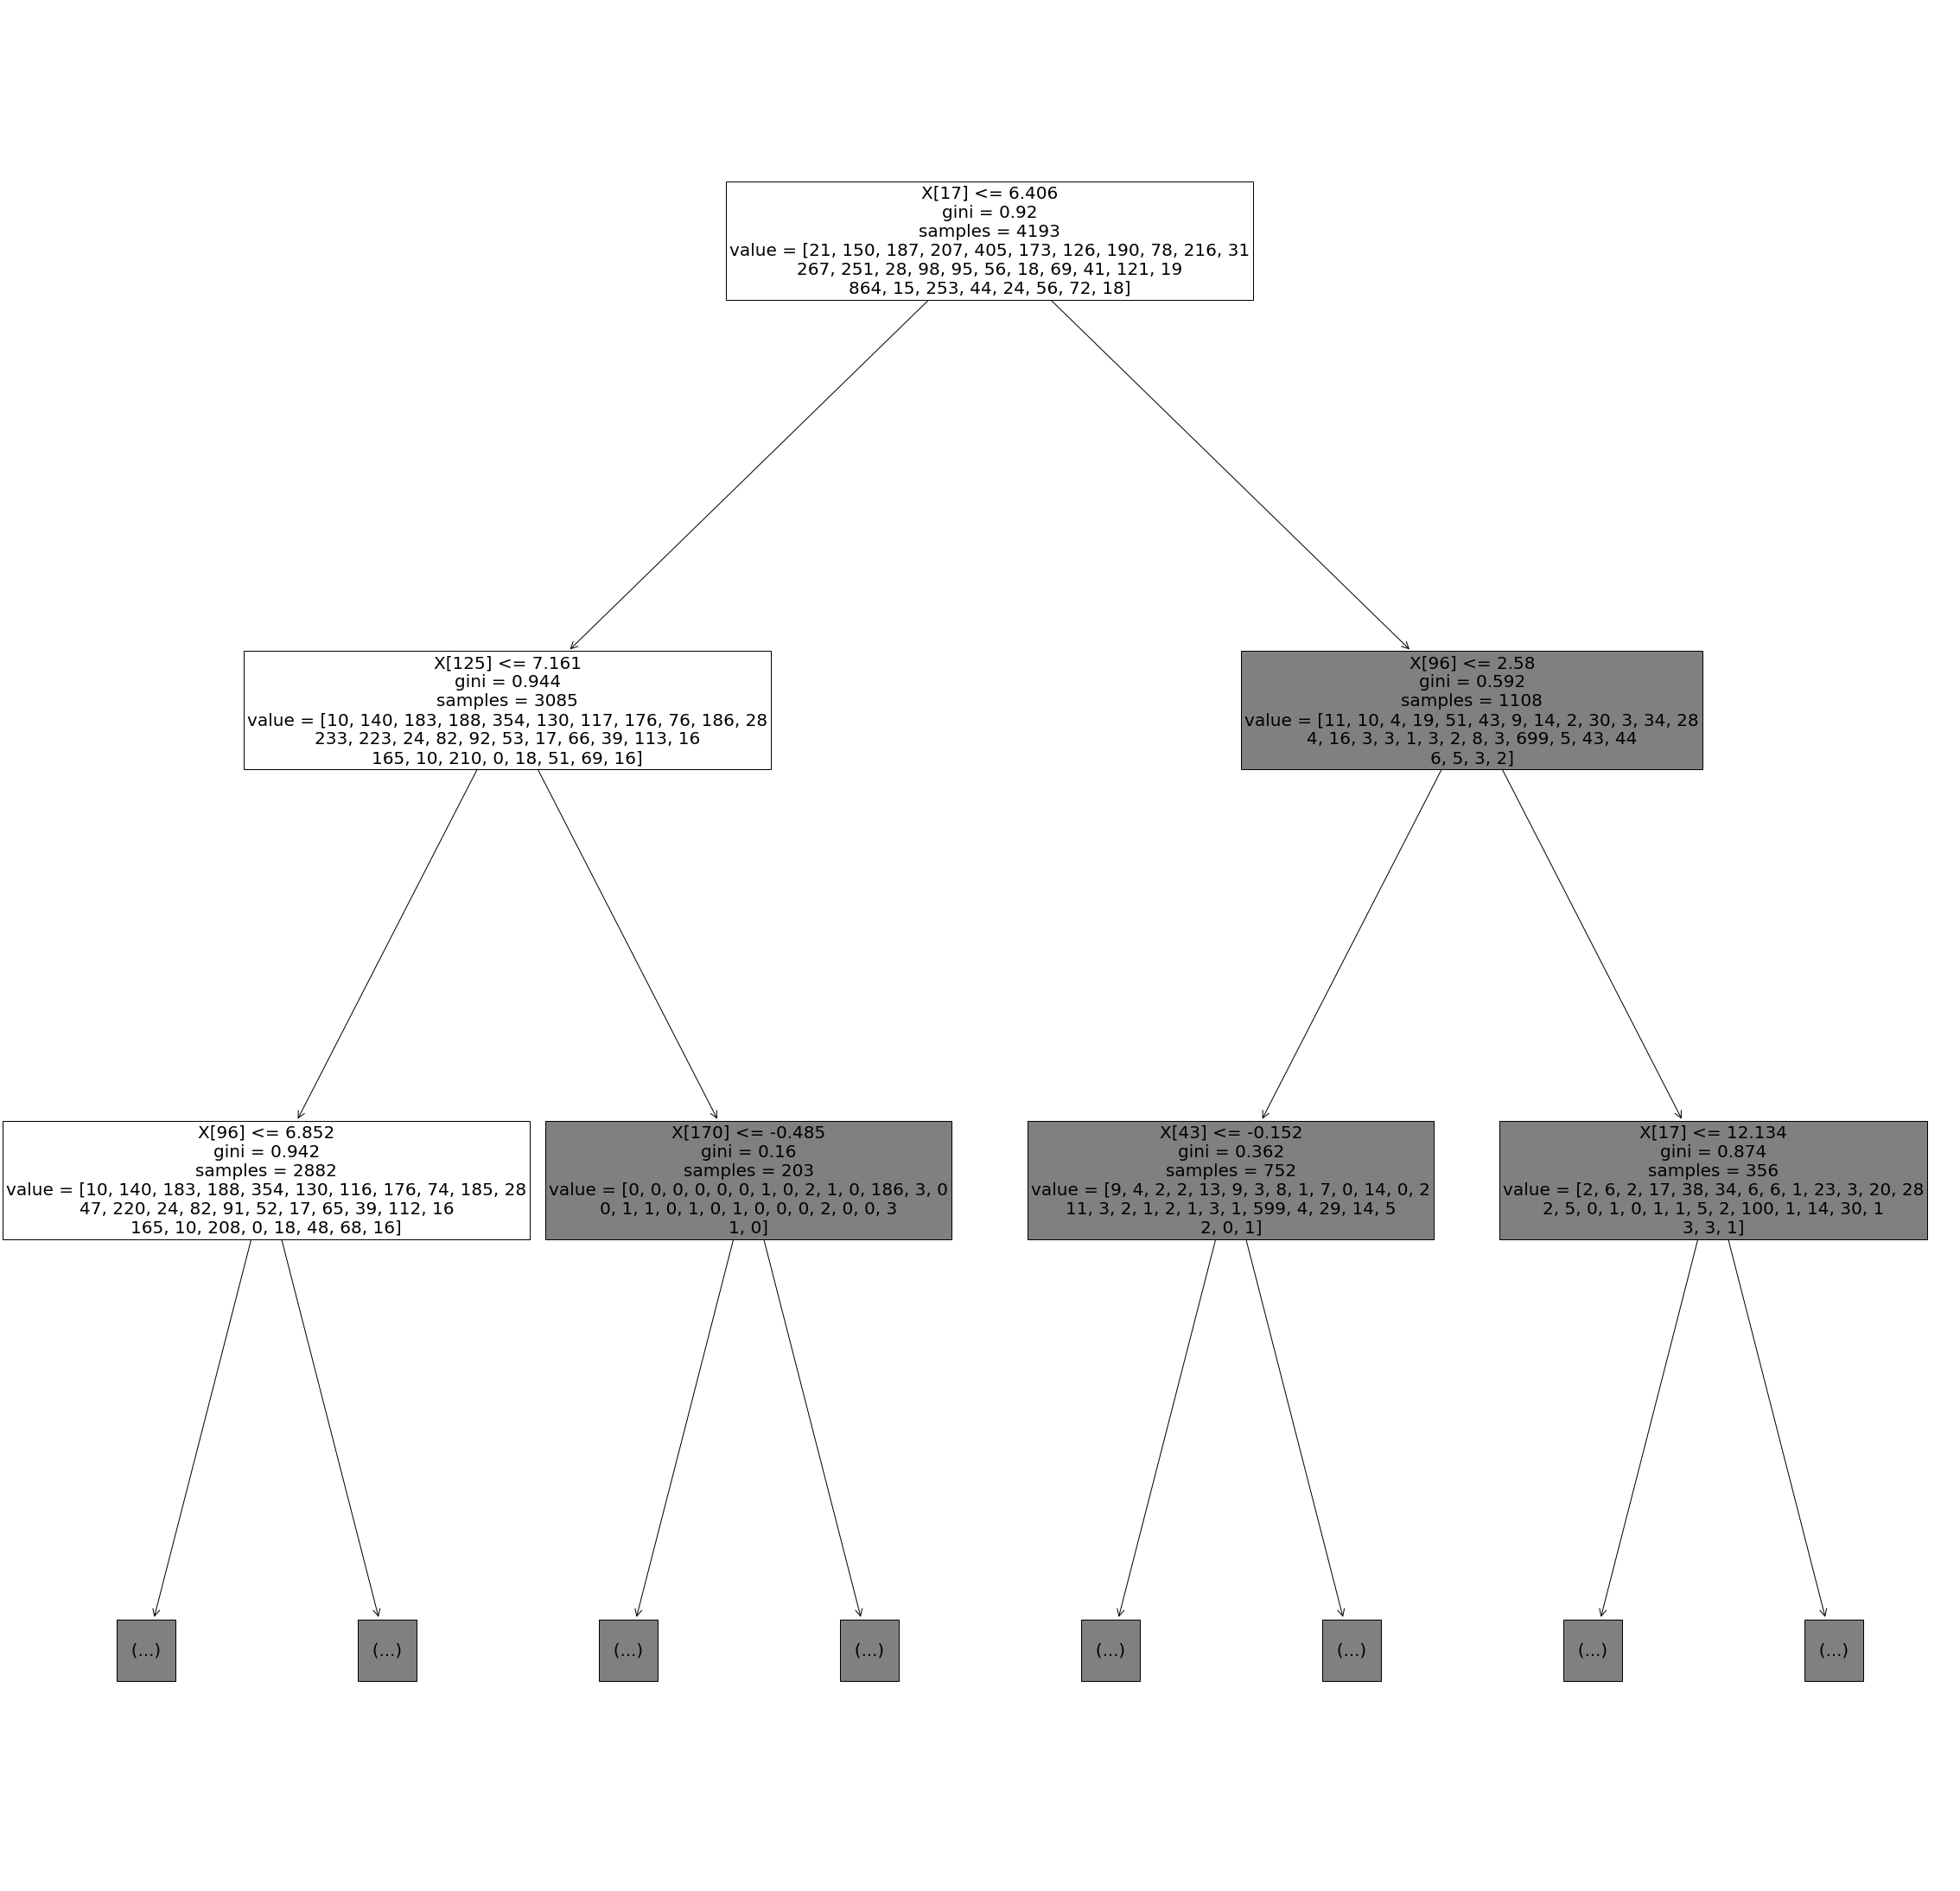

In [20]:
fig,ax = plt.subplots(figsize=[40,40])
full_tree = tree.plot_tree(clf,ax=ax,max_depth = 2,fontsize = 20)

In [11]:
#fig.savefig("../data/classifier_tree.png")

In [21]:
imp_comp = [17,125,96]
imp_comp_data = pd.DataFrame(index = M.index)

for i in imp_comp:
    imp_comp_data= imp_comp_data.join(M[str(i)])
imp_comp_data

,17,125,96
A1BG-AS1,-0.001699,0.005738,-0.000419
A1CF,0.007418,0.000970,-0.006314
A2M,-0.004410,-0.010346,-0.001936
A2M-AS1,0.001134,0.000696,-0.002563
A2ML1,-0.009162,-0.002272,-0.001818
...,...,...,...
ZYG11A,0.010359,-0.002843,0.002364
ZYG11B,0.008604,0.002747,0.003532
ZYX,-0.002168,-0.001710,-0.003094
ZZEF1,0.000353,0.006304,0.002890


In [22]:
import tqdm.notebook as tqdm
cutoffs = {}
for i in tqdm.tqdm(imp_comp_data.columns):
    single_run = pd.Series(list(imp_comp_data[i]))
    single_run_score = stats.normaltest(single_run.values)[0]
    initial_score = single_run_score
    sig_genes = []
    while single_run_score > initial_score*.75:
        sig_genes.append(max((single_run)))
        single_run = single_run.drop(single_run.loc[single_run==max((single_run))].index)
        single_run_score = stats.normaltest(single_run.values)[0]
    cutoff = min(sig_genes)
    cutoffs.update({i:cutoff})

In [23]:
cutoffs

{'17': 0.042208198720324566,
 '125': 0.06261464157848477,
 '96': 0.0723428894319115}

In [37]:
def plot_gene_weights(data,component,cutoffs):
    fig,ax = plt.subplots()
    for i in range(len(data[component].index)):
        if data[component].iloc[i] > cutoffs[component]:
            ax.plot(i,data[component].iloc[i],"o",color="tab:blue")
        else:
            ax.plot(i,data[component].iloc[i],"o",color="tab:grey")
    ax.set_xlim(-10,len(data[component].index))
    ax.plot([-10,len(data[component].index)],[cutoffs[component],cutoffs[component]],"--",color="tab:grey")
    ax.plot([-10,len(data[component].index)],[-cutoffs[component],-cutoffs[component]],"--",color="tab:grey")
    
    return ax

def iModulon_genes(data,component,cutoff):
    iMod = []
    for i in range(len(data[component].index)):
        if data[component].iloc[i] > cutoff[component]:
            iMod.append(data.index[i])
    return iMod

def plot_gene_activities(data,component,comp_num = None):
    fig,ax = plt.subplots(figsize=[40,5])
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'pink']
    current_label = ""
    previous_label = ""
    x_labels = []
    color_count = 0
    for i in data.index:
        previous_label = current_label
        current_label = i.split("_")[0]
        if comp_num is None:
            ax.bar(i,data[component].loc[i],color=colors[color_count]
                   ,width=1)
            if previous_label != current_label:
                color_count+=1
                if color_count > len(colors)-2:
                    color_count=0
                x_labels.append(current_label)
            else:
                x_labels.append("")
        elif current_label in comp_num and comp_num is not None:
            ax.bar(i,data[component].loc[i],color="tab:blue",width=1)
            x_labels.append("")
    plt.xticks(range(len(x_labels)),x_labels,rotation = 45, ha = "right")
    
    return ax
        

<AxesSubplot:>

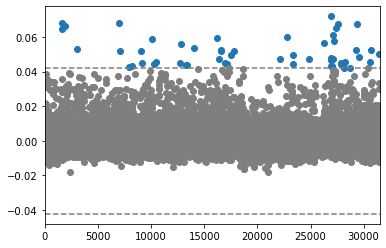

In [25]:
plot_gene_weights(imp_comp_data,"17",cutoffs)

<AxesSubplot:>

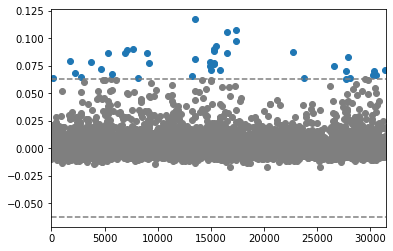

In [26]:
plot_gene_weights(imp_comp_data,"125",cutoffs)

<AxesSubplot:>

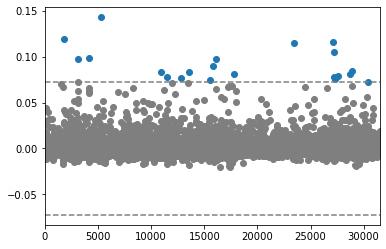

In [28]:
plot_gene_weights(imp_comp_data,"96",cutoffs)

In [30]:
imod = iModulon_genes(imp_comp_data,"96",cutoffs)
imod

['ADGRF5',
 'ATP6V0D2',
 'C9orf84',
 'CLNK',
 'HS6ST3',
 'ITGA6',
 'LINC01187',
 'MAGI1',
 'NXPH2',
 'PACRG',
 'PDE1C',
 'RCAN2',
 'RP11-690G19.4',
 'SLC26A7',
 'SLC4A1',
 'SLC4A9',
 'SLIT2',
 'SNTB1',
 'THRB-AS1',
 'TMEM101',
 'WBSCR17']

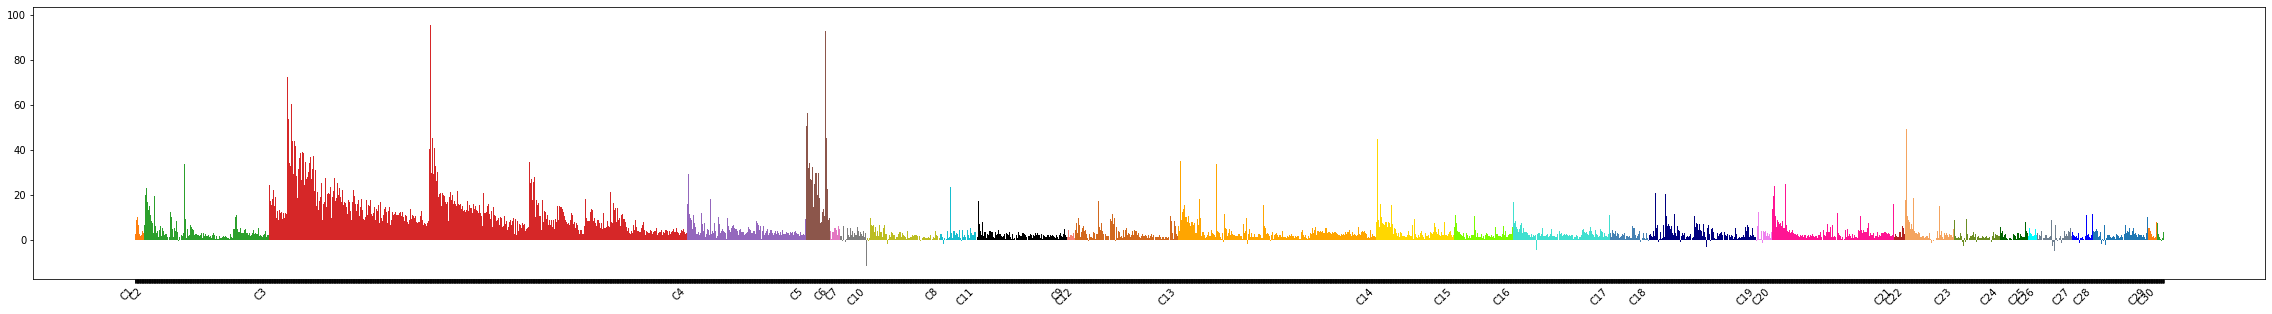

In [38]:
ax = plot_gene_activities(A,"17")

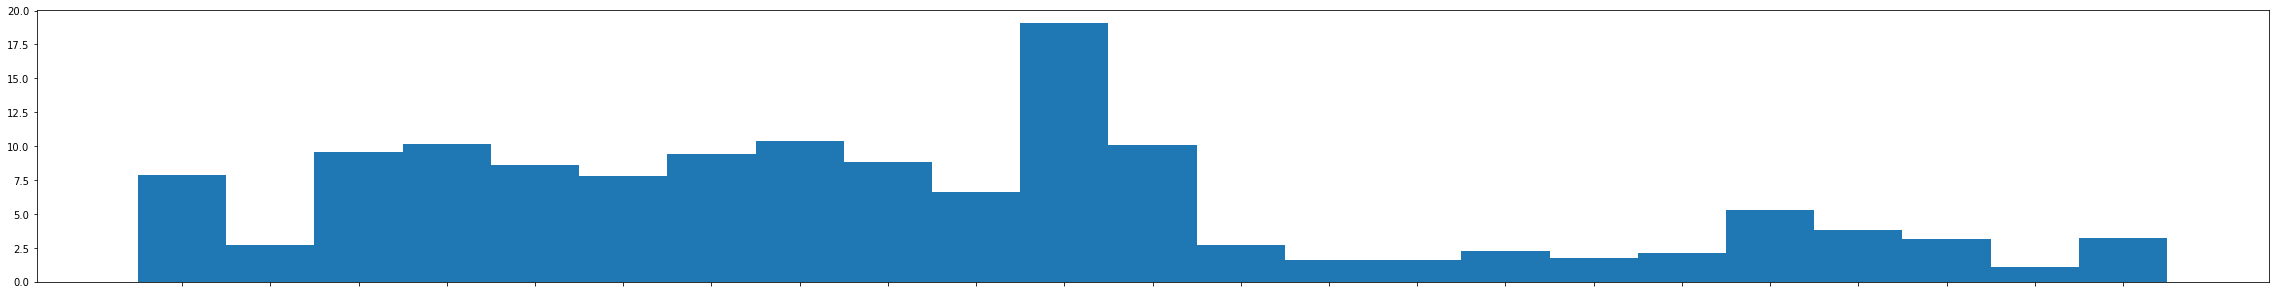

In [39]:
ax = plot_gene_activities(A,"17","C1")